## Project 2 - Housing Project

### Notebook 2: Modelling

After cleaning and processing the dataset and selecting the feaures in Notebook 1, we will proceed with building a model to predict the HDB resale prices.

### Multilinear Regression

Linear regression is a linear approach to model the relationship between a target variable and one or more explanatory variables (aka features). It is excellent in helping predict continuous variables, such as house prices. 
For this project, as there are multiple features used to predict house prices, we will be using a Multilinear Regression.  <br>
The regression equation can be written as:
$$ \text{Y} = \beta_0 + \beta_1 \text{X}_1 + \beta_2 \text{X}_2 + ... + \beta_p \text{X}_p + \epsilon $$

where
- $\text{Y}$ = Target Variable (HDB Resale Price)
- $\text{X}$ = Features
- $\beta$ = Weights / Coefficients
 
 Through our modelling, we hope to determine the best coefficients for the features X, to predict the most accurate House price Y. The success of the model will be determined by the Root Mean Square Error (RMSE) score.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict,GridSearchCV
%matplotlib inline

C:\Users\tiffa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df1 = pd.read_csv("./datasets/hdb_test.csv",low_memory=False) 
df2 = pd.read_csv("./datasets/hdb_test_droptown.csv",low_memory=False) # dataset with town features dropped
df3 = pd.read_csv("./datasets/hdb_test_droptownmrt.csv",low_memory=False) # dataset with town and mrt name features dropped
df0 = pd.read_csv("./datasets/train.csv",low_memory=False) # original train dataset


In [4]:
df1.columns.tolist()

['Unnamed: 0',
 'mid',
 'max_floor_lvl',
 'commercial',
 'market_hawker',
 'precinct_pavilion',
 'total_dwelling_units',
 'Mall_Nearest_Distance',
 'Hawker_Nearest_Distance',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'mrt_nearest_distance',
 'bus_stop_nearest_distance',
 'pri_sch_nearest_distance',
 'pri_sch_affiliation',
 'top_pri_sch',
 'town_region_OCR',
 'flat_type_1-2 ROOM',
 'flat_type_3 ROOM',
 'flat_type_4 ROOM',
 'flat_type_5 ROOM',
 'flat_model_Apartment',
 'flat_model_DBSS',
 'flat_model_Improved-Maisonette',
 'flat_model_Maisonette',
 'flat_model_Model A-Maisonette',
 'flat_model_Model A2',
 'flat_model_New Generation',
 'flat_model_Premium Apartment',
 'flat_model_Premium Apartment Loft',
 'flat_model_Premium Maisonette',
 'flat_model_Simplified',
 'flat_model_Standard',
 'flat_model_Terrace',
 'flat_model_Type S1',
 'flat_model_Type S2',
 'town_BEDOK',
 'town_BUKIT BATOK',
 'town_BUKIT MERAH',
 'town_CENTRAL AREA',
 'town_CLEMENTI',
 'town_HOUGANG',
 'town_JURONG E

In [5]:
df1 = df1.drop(columns='Unnamed: 0')
df2 = df2.drop(columns='Unnamed: 0')
df3 = df3.drop(columns='Unnamed: 0')

In [6]:
df1.head()

mid  max_floor_lvl  commercial  market_hawker  precinct_pavilion  \
0   11             25           0              0                  0   
1    8              9           0              0                  0   
2   14             16           0              0                  0   
3    3             11           1              0                  0   
4    2              4           0              0                  0   

   total_dwelling_units  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0                   142                1094.09               154.753357   
1                   112                 866.94               640.151925   
2                    90                1459.58              1762.082341   
3                    75                 950.18               726.215262   
4                    48                 729.77              1540.151439   

   hawker_food_stalls  hawker_market_stalls  ...  mrt_name_Ubi  \
0                  84                    60  ...             0   
1                  80                    77  ...             0   
2                  84                    95  ...             0   
3                  32                    86  ...             0   
4                  45                     0  ...             0   

   mrt_name_Woodleigh  mrt_name_Yio Chu Kang  lease_(66, 74]  lease_(74, 84]  \
0                   0                      0               0               0   
1                   0                      0               1               0   
2                   0                      0               0               1   
3                   0                      0               0               1   
4                   0                      0               1               0   

   lease_(84, 98]  floor_area__(80, 96]  floor_area__(96, 113]  \
0               1                     1                      0   
1               0                     0                      0   
2               0                     0                      0   
3               0                     0                      1   
4               0                     1                      0   

   floor_area__(113, 280]     real_price  
0                       0  504825.538233  
1                       1  464709.993012  
2                       1  565833.896016  
3                       0  392017.106201  
4                       0  224736.048265  

[5 rows x 105 columns]

### 1. Linear Regression Feasibility Check

Before proceeding, we need to check for key assumptions for a multilinear regression analysis. <br>
L - Linear relationship <br>
I - Independent errors <br>
N - Normally distributed errors <br>
E - Equal variance of errors (homoscedasticity) <br>
M - No Multicollinearity/Independence of Predictors - ✓ ***Done in Notebook 1 during feature selection***

Multicollinearity is a situation where two or more predictors highly linearly related. <br>
It creates a problem of redundancy, where both predictor variables are providing similar information about the target variable, hence amplifying and leaading to unreliable coefficients.


#### L - Linear Relationship

There needs to be a linear relationship between target and feature variables. Based on the scatter plots below between features and resale price, there exists a linear correlation.

#### I - Independent errors
Ensure that residuals are independent of each other and not showing any correlation. We can use an autocorrelation plot.

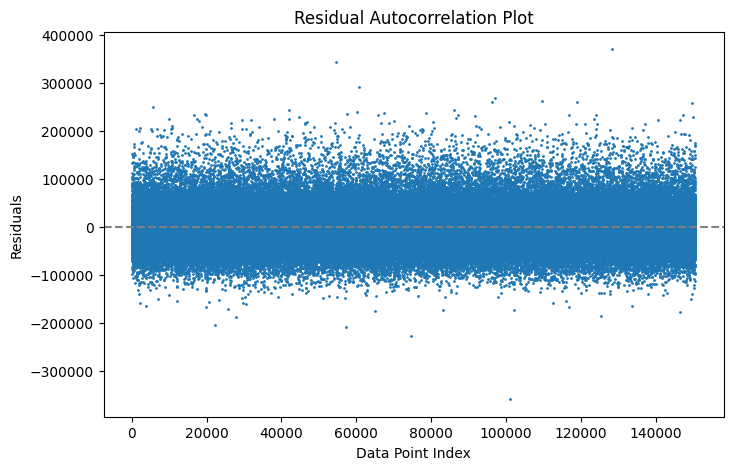

In [7]:
# Residual Autocorrelation Plot

# Create the predictor variables (X) and the target variable (y)
X = df1.drop(columns = ['real_price'])
y = df1['real_price']

# Add a constant column to the predictor variables - statmodels requirement
X = sm.add_constant(X)
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
# Predicted y values to get residuals
y_preds = model.predict(X)
residuals = y - y_preds
plt.figure(figsize=(8, 5))
plt.scatter(range(len(residuals)), residuals, s = 1)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Residuals')
plt.title('Residual Autocorrelation Plot')
plt.show()

We can see that errors are scattered randomly. Independent Error check passed.

#### N - Normality

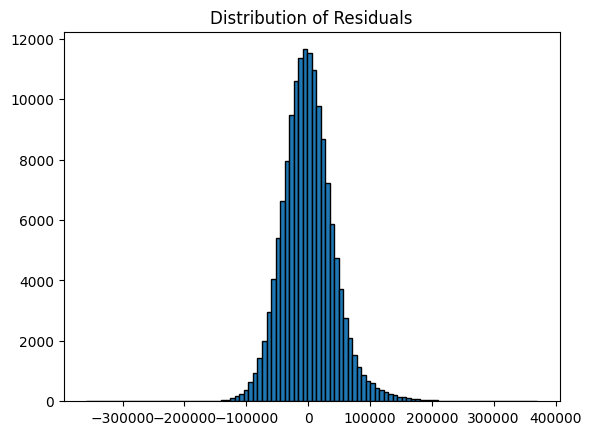

In [8]:
plt.hist(residuals, bins=100, edgecolor='k')
plt.title('Distribution of Residuals')
plt.show()

We can see that the residuals follow a normal distribution. Normality check passed.

#### E - Equal variance of errors (Homoscedasticity)

Text(0.5, 0, 'Predicted Values')

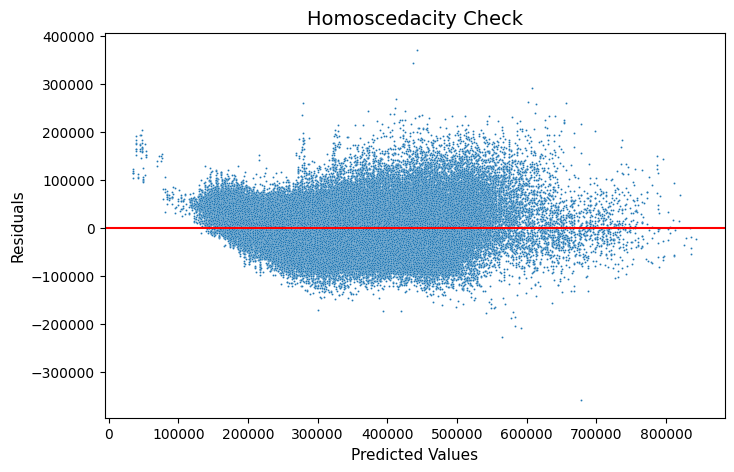

In [9]:

plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=X, x=y_preds, y=y-y_preds,s=2)
ax.axhline(y=0, c='red')
plt.title('Homoscedacity Check', fontsize=14)
plt.ylabel('Residuals', fontsize=11)
plt.xlabel('Predicted Values', fontsize=11)

We can see that the residuals seem to be evenly distributed with no discernable pattern. Homodescacity check passed.

Once done with our linear regression feasibility checks, we can begin to build the machine learning model using the regular project pipeline.

### 2. Train Test Split

In [10]:
features = [col for col in df1._get_numeric_data().columns if col != 'real_price'] # drop target variable 
X = df1[features]
y = df1['real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

It is important to note that the "test" dataset here is actually our **validation** data. Hence, the term "validation" will be used in this notebook.

### 3. Feature Scaling

We perform scaling to bring all features to a similar numerical range. This is especially used when features have different units of measurement. In our dataset, this is useful as the dataset has metrics like distance to places, no. of units and no. of storeys etc.

In [11]:
X_train.columns

Index(['mid', 'max_floor_lvl', 'commercial', 'market_hawker',
       'precinct_pavilion', 'total_dwelling_units', 'Mall_Nearest_Distance',
       'Hawker_Nearest_Distance', 'hawker_food_stalls', 'hawker_market_stalls',
       ...
       'mrt_name_Toa Payoh', 'mrt_name_Ubi', 'mrt_name_Woodleigh',
       'mrt_name_Yio Chu Kang', 'lease_(66, 74]', 'lease_(74, 84]',
       'lease_(84, 98]', 'floor_area__(80, 96]', 'floor_area__(96, 113]',
       'floor_area__(113, 280]'],
      dtype='object', length=104)

In [12]:
X_train.dtypes

mid                       int64
max_floor_lvl             int64
commercial                int64
market_hawker             int64
precinct_pavilion         int64
                          ...  
lease_(74, 84]            int64
lease_(84, 98]            int64
floor_area__(80, 96]      int64
floor_area__(96, 113]     int64
floor_area__(113, 280]    int64
Length: 104, dtype: object

In [13]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc  = ss.transform(X_test)

### 4. Create a function to evaluate R2 and RMSE for any model:
As we are going to explore and evaluate the result of different models, this function will be useful.

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse_score(model, X_train, X_test, y_train, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_train, y_train, cv = 5).mean()
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv = 5,scoring = 'neg_root_mean_squared_error').mean()
        
    print(f"Model: {model}")
    print(f"Train RMSE: {round(train_rmse, 4)}")
    print(f"Validation RMSE: {round(test_rmse, 4)}")
    print(f"Train R2: {round(train_r2, 4)}")
    print(f"Validation R2: {round(test_r2, 4)}")
    print(f"Cross Val Score (R2 Score): {round(cross_val, 4)}")
    print(f"Cross Val Score (RMSE Score): {round(cross_val_rmse, 4)}")

### 5. Building of Models

### 5a. Dummy Regressor
For regression problems, a rule of thumb is to use the mean or median to predict the training data output. <br>
Therefore, the Dummy Regressor has been selected to provide simple baseline predictions for our house prices, and this can then be compared to real regressors. <br>


In [15]:
from sklearn.dummy import DummyRegressor
dummy_mod = DummyRegressor().fit(X_train_sc, y_train)


In [16]:
rmse_score(dummy_mod, X_train_sc, X_test_sc, y_train, y_test)

Model: DummyRegressor()
Train RMSE: 105021.3471
Validation RMSE: 105658.4603
Train R2: 0.0
Validation R2: -0.0
Cross Val Score (R2 Score): -0.0001
Cross Val Score (RMSE Score): 105021.1031


### 5b. Linear Regression
We begin with building the basic linear regression model.

In [17]:
# instantiate model
lr = LinearRegression()

In [18]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [19]:
rmse_score(lr, X_train_sc, X_test_sc, y_train, y_test)

Model: LinearRegression()
Train RMSE: 41742.188
Validation RMSE: 41880.1602
Train R2: 0.842
Validation R2: 0.8429
Cross Val Score (R2 Score): 0.8417
Cross Val Score (RMSE Score): 41785.497


### 5c. Regularization
One of the key to building a successful machine learning model is to avoid overfitting. Overfitting happens when our model is trying to capture all the noise in our data. One of the techniques to help identify this noise and reduce their impact on the model is through Regularization. This is done by shrinking coefficient estimates to zero. 
Two popular regularization methods are Ridge and Lasso Regression.

#### Ridge Regression

In [20]:
r_alphas = np.logspace(0, 5, 100)
k = 5
# Cross-validate over our list of ridge alphas to get scores
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=k)
ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')

In [21]:
# Find optimal alpha
optimal_alpha_ridge = ridge_cv.alpha_
print(f"optimal alpha is {ridge_cv.alpha_}")

optimal alpha is 2.25701971963392


In [22]:
# cross validate ridge regression R^2 with optimal alpha
ridge_cv = RidgeCV(alphas=optimal_alpha_ridge).fit(X_train_sc, y_train)

In [23]:
# Evaluate the model using function created earlier
rmse_score(ridge_cv, X_train_sc, X_test_sc, y_train, y_test)

Model: RidgeCV(alphas=2.25701971963392)
Train RMSE: 41742.1893
Validation RMSE: 41880.0018
Train R2: 0.842
Validation R2: 0.8429
Cross Val Score (R2 Score): 0.8417
Cross Val Score (RMSE Score): 41785.4964


#### Lasso Regression

In [24]:
lasso_cv = LassoCV(n_alphas=500, cv=5)
lasso_cv.fit(X_train_sc, y_train)

LassoCV(cv=5, n_alphas=500)

In [25]:
# find optimal alpha
optimal_alpha_lasso = lasso_cv.alpha_
optimal_alpha_lasso

53.53615536435511

In [26]:
# input lasso model with optimal alpha value found using lassoCV
lasso_cv_ = Lasso(alpha=optimal_alpha_lasso).fit(X_train_sc, y_train)

In [27]:
rmse_score(lasso_cv_, X_train_sc, X_test_sc, y_train, y_test)

Model: Lasso(alpha=53.53615536435511)
Train RMSE: 41760.0893
Validation RMSE: 41887.6313
Train R2: 0.8419
Validation R2: 0.8428
Cross Val Score (R2 Score): 0.8415
Cross Val Score (RMSE Score): 41801.782


In [28]:
# Feature Importance: show coefficient for variables, order the absolute coefficients from largest to smallest

coeffs = lasso_cv.coef_
df_coeffs = pd.DataFrame({'X_variable': X.columns, 'coefficients': coeffs})
df_coeffs['abs_coeff'] = df_coeffs['coefficients'].abs()
df_coeffs.sort_values(by = 'abs_coeff', ascending=False).reset_index().drop(columns='index')

X_variable  coefficients     abs_coeff
0            flat_type_3 ROOM -45293.979395  45293.979395
1      floor_area__(113, 280]  39064.212801  39064.212801
2             town_region_OCR -35498.860321  35498.860321
3            flat_type_4 ROOM -34818.780810  34818.780810
4       floor_area__(96, 113]  26891.033703  26891.033703
..                        ...           ...           ...
99       mrt_name_Jalan Besar     22.247925     22.247925
100  pri_sch_nearest_distance    -16.097513     16.097513
101            mrt_name_Dover      5.550011      5.550011
102           mrt_name_Novena     -0.000000      0.000000
103         mrt_name_Buangkok     -0.000000      0.000000

[104 rows x 3 columns]

#### Linear vs Ridge vs Lasso Model

In [71]:
results = [
    {"model": "Baseline (Dummy)", "no. of features": X.shape[1], "alpha": None, "train RMSE": 105021, "validation RMSE": 105658},
    {"model": "Linear Regression", "no. of features": X.shape[1], "alpha": None, "train RMSE": 41742, "validation RMSE": 41880},
    {"model": "Ridge Regression","no. of features": X.shape[1], "alpha": optimal_alpha_ridge,  "train RMSE": 41742, "validation RMSE": 41880},
    {"model": "Lasso Regression", "no. of features": X.shape[1], "alpha": optimal_alpha_lasso,  "train RMSE":  41760, "validation RMSE": 41888}
]


# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df["alpha"] = results_df["alpha"].apply(lambda x: round(x, 2) if x is not None else None)

# Display the summary table
print("Results:")
results_df


Results:


model  no. of features  alpha  train RMSE  validation RMSE
0   Baseline (Dummy)              104    NaN      105021           105658
1  Linear Regression              104    NaN       41742            41880
2   Ridge Regression              104   2.26       41742            41880
3   Lasso Regression              104  53.54       41760            41888

Based on the summary table, all the models did not display any overfitting as the train and test scores were similar. <br>
The RMSE for train and validation data remainined the same across the model, hence seems like the Ridge and Lasso Regularization techniques did not improve the results of the model. <br>
This can possibly be explained by the fact that some features with high VIF were removed to reduce multicollinearity.

### 6. Backward Feature Selection based on RMSE

The original RMSE from the initial Linear Regression using the test dataset was 41,880 with R2 Score of 0.842. <BR>
In this section, we explore using Backward Feature Selection to see if we can improve RMSE. Backward feature selection is the step by step elimination of features by starting with all features and then removing least relevant features one step at a time and then evaluating the model's performance. <br>
If removing a feature results in a lower RMSE, we remove that feature from the selected features list. <br>
We continue this process until no further improvement in RMSE is observed or until only one feature is left.

In [30]:
model = LinearRegression()

# Define a function to evaluate the model and calculate RMSE
def evaluate_model(X_train_sc, X_test_sc, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

# List to keep track of selected features
selected_features = list(X.columns)

# Initialize a variable to store the best RMSE
best_rmse = evaluate_model(X_train, X_test, y_train, y_test)
print("Initial RMSE with all features:", best_rmse)

# Perform backward feature selection
while len(selected_features) > 1:  # Ensure at least one feature is retained
    worst_feature = None
    for feature in selected_features:
        # Temporarily remove one feature at a time and evaluate the model
        temp_selected_features = [f for f in selected_features if f != feature]
        X_train_temp = X_train[temp_selected_features]
        X_test_temp = X_test[temp_selected_features]
        rmse = evaluate_model(X_train_temp, X_test_temp, y_train, y_test)
        if rmse < best_rmse:
            best_rmse = rmse
            worst_feature = feature
    
    if worst_feature is not None:
        selected_features.remove(worst_feature)
        print(f"Removed feature: {worst_feature}, RMSE: {best_rmse}")
    else:
        # If no feature can be removed to improve RMSE, exit the loop
        break

print("Final selected features:", selected_features)
print("Final RMSE with selected features:", best_rmse)


Initial RMSE with all features: 41880.16024225019
Final selected features: ['mid', 'max_floor_lvl', 'commercial', 'market_hawker', 'precinct_pavilion', 'total_dwelling_units', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'pri_sch_affiliation', 'top_pri_sch', 'town_region_OCR', 'flat_type_1-2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved-Maisonette', 'flat_model_Maisonette', 'flat_model_Model A-Maisonette', 'flat_model_Model A2', 'flat_model_New Generation', 'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft', 'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Standard', 'flat_model_Terrace', 'flat_model_Type S1', 'flat_model_Type S2', 'town_BEDOK', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_CENTRAL AREA', 'town_CLEMENTI', 'town_HOUGA

Seems like backward feature selection does not help to improve the RMSE score either. <br> 
Therefore, I will retain all the features in my model.

#### Try the dataset with *town* feature reduced (remaining: 92 Features)

In [31]:
features = [col for col in df2._get_numeric_data().columns if col != 'real_price'] # drop target variable 
X2 = df2[features]
y2 = df2['real_price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

In [32]:
ss = StandardScaler()

X2_train_sc = ss.fit_transform(X2_train)
X2_test_sc  = ss.transform(X2_test)

##### 92 Features: Linear Regression

In [33]:
lr2 = LinearRegression()

In [34]:
lr2.fit(X2_train_sc,y2_train)

LinearRegression()

In [35]:
rmse_score(lr2, X2_train_sc, X2_test_sc, y2_train, y2_test)

Model: LinearRegression()
Train RMSE: 45915.5029
Validation RMSE: 46145.3357
Train R2: 0.8089
Validation R2: 0.8093
Cross Val Score (R2 Score): 0.8085
Cross Val Score (RMSE Score): 45955.071


##### 92 Features: Ridge Regression

In [36]:
r_alphas = np.logspace(0, 5, 100)
k = 5
ridge_cv2 = RidgeCV(alphas=r_alphas, scoring='r2', cv=k)
ridge_cv2.fit(X2_train_sc, y_train)
optimal_alpha_ridge_2 = ridge_cv.alpha_

# cross validate ridge regression R^2 with optimal alpha
ridge_cv2 = RidgeCV(alphas=optimal_alpha_ridge_2).fit(X2_train_sc, y2_train)

In [37]:
# Evaluate the model using function created earlier
rmse_score(ridge_cv2, X2_train_sc, X2_test_sc, y2_train, y2_test)

Model: RidgeCV(alphas=2.25701971963392)
Train RMSE: 45915.504
Validation RMSE: 46145.1959
Train R2: 0.8089
Validation R2: 0.8093
Cross Val Score (R2 Score): 0.8085
Cross Val Score (RMSE Score): 45955.0729


##### Lasso Regression

In [38]:
lasso_cv2 = LassoCV(n_alphas=500, cv=5)
lasso_cv2.fit(X2_train_sc, y2_train)
optimal_alpha_lasso_2 = lasso_cv.alpha_
lasso_cv2_ = Lasso(alpha=optimal_alpha_lasso_2).fit(X2_train_sc, y2_train)

In [39]:
rmse_score(lasso_cv2_, X2_train_sc, X2_test_sc, y2_train, y2_test)

Model: Lasso(alpha=53.53615536435511)
Train RMSE: 45925.9569
Validation RMSE: 46149.4259
Train R2: 0.8088
Validation R2: 0.8092
Cross Val Score (R2 Score): 0.8084
Cross Val Score (RMSE Score): 45965.4841


In [40]:
# Feature Importance: show coefficient for variables, order the absolute coefficients from largest to smallest

coeffs = lasso_cv2.coef_
df_coeffs = pd.DataFrame({'X_variable': X2.columns, 'coefficients': coeffs})
df_coeffs['abs_coeff'] = df_coeffs['coefficients'].abs()
df_coeffs.sort_values(by = 'abs_coeff', ascending=False).reset_index().drop(columns='index')

X_variable  coefficients     abs_coeff
0          flat_type_3 ROOM -46792.190026  46792.190026
1          flat_type_4 ROOM -36096.033006  36096.033006
2    floor_area__(113, 280]  34763.684571  34763.684571
3             max_floor_lvl  25662.580414  25662.580414
4     floor_area__(96, 113]  23982.102566  23982.102566
..                      ...           ...           ...
87           mrt_name_Kovan    338.054620    338.054620
88          mrt_name_Mattar    323.805985    323.805985
89      mrt_name_Kaki Bukit   -141.841906    141.841906
90       mrt_name_Woodleigh    -10.622235     10.622235
91  mrt_name_Chinese Garden     -0.000000      0.000000

[92 rows x 3 columns]

#### Try the dataset with *town and mrt name* feature reduced (remaining: 54 Features)

In [41]:
features = [col for col in df3._get_numeric_data().columns if col != 'real_price'] # drop target variable 
X3 = df3[features]
y3 = df3['real_price']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

In [42]:
ss = StandardScaler()

X3_train_sc = ss.fit_transform(X3_train)
X3_test_sc  = ss.transform(X3_test)

In [43]:
df3.shape

(150634, 53)

##### 54 Features: Linear Regression

In [44]:
lr3 = LinearRegression()

In [45]:
lr3.fit(X3_train_sc,y3_train)

LinearRegression()

In [46]:
rmse_score(lr3, X3_train_sc, X3_test_sc, y3_train, y3_test)

Model: LinearRegression()
Train RMSE: 43998.7155
Validation RMSE: 44281.1188
Train R2: 0.8245
Validation R2: 0.8244
Cross Val Score (R2 Score): 0.8243
Cross Val Score (RMSE Score): 44023.0837


##### 54 Features: Alpha Regression

In [47]:
r_alphas = np.logspace(0, 5, 100)
k = 5
ridge_cv2 = RidgeCV(alphas=r_alphas, scoring='r2', cv=k)
ridge_cv2.fit(X3_train_sc, y3_train)
optimal_alpha_ridge_3 = ridge_cv.alpha_

# cross validate ridge regression R^2 with optimal alpha
ridge_cv3 = RidgeCV(alphas=optimal_alpha_ridge_3).fit(X3_train_sc, y3_train)

In [48]:
# Evaluate the model using function created earlier
rmse_score(ridge_cv3, X3_train_sc, X3_test_sc, y3_train, y3_test)

Model: RidgeCV(alphas=2.25701971963392)
Train RMSE: 43998.7166
Validation RMSE: 44280.9808
Train R2: 0.8245
Validation R2: 0.8244
Cross Val Score (R2 Score): 0.8243
Cross Val Score (RMSE Score): 44023.0852


##### Lasso Regression

In [49]:
lasso_cv3 = LassoCV(n_alphas=500, cv=5)
lasso_cv3.fit(X3_train_sc, y3_train)
optimal_alpha_lasso_3 = lasso_cv.alpha_
lasso_cv3_ = Lasso(alpha=optimal_alpha_lasso_3).fit(X3_train_sc, y3_train)

In [50]:
rmse_score(lasso_cv3_, X3_train_sc, X3_test_sc, y3_train, y3_test)

Model: Lasso(alpha=53.53615536435511)
Train RMSE: 44007.5991
Validation RMSE: 44279.9171
Train R2: 0.8244
Validation R2: 0.8244
Cross Val Score (R2 Score): 0.8242
Cross Val Score (RMSE Score): 44032.0154


In [51]:
# Feature Importance: show coefficient for variables, order the absolute coefficients from largest to smallest

coeffs = lasso_cv3.coef_
df_coeffs = pd.DataFrame({'X_variable': X3.columns, 'coefficients': coeffs})
df_coeffs['abs_coeff'] = df_coeffs['coefficients'].abs()
df_coeffs.sort_values(by = 'abs_coeff', ascending=False).reset_index().drop(columns='index')

X_variable  coefficients     abs_coeff
0                    flat_type_3 ROOM -42474.479735  42474.479735
1              floor_area__(113, 280]  41668.947995  41668.947995
2                    flat_type_4 ROOM -34340.951256  34340.951256
3               floor_area__(96, 113]  29259.533350  29259.533350
4                     town_region_OCR -26056.280581  26056.280581
5                       max_floor_lvl  23440.640634  23440.640634
6                floor_area__(80, 96]  20233.474209  20233.474209
7                      lease_(84, 98]  19114.530059  19114.530059
8             Hawker_Nearest_Distance -19050.732418  19050.732418
9                  flat_type_1-2 ROOM -17728.710437  17728.710437
10                   flat_type_5 ROOM -16891.958276  16891.958276
11               mrt_nearest_distance -16335.023365  16335.023365
12                       town_PUNGGOL  14849.195165  14849.195165
13                                mid  14054.545646  14054.545646
14                 town_MARINE PARADE  11820.258007  11820.258007
15              flat_model_Maisonette  11775.420721  11775.420721
16                    flat_model_DBSS  11617.936364  11617.936364
17               total_dwelling_units -11520.735028  11520.735028
18                     lease_(66, 74]  10269.191838  10269.191838
19                      town_CLEMENTI   8532.631254   8532.631254
20                 flat_model_Terrace   7985.481570   7985.481570
21               flat_model_Apartment   7494.026584   7494.026584
22               hawker_market_stalls   6617.877266   6617.877266
23                     lease_(74, 84]   6490.190452   6490.190452
24                flat_model_Standard  -6329.408589   6329.408589
25                         town_BEDOK   6193.923840   6193.923840
26                      town_SENGKANG   5873.762318   5873.762318
27                   town_BUKIT MERAH   5766.162069   5766.162069
28      flat_model_Model A-Maisonette   4778.382140   4778.382140
29                 flat_model_Type S1   4752.629108   4752.629108
30                 flat_model_Type S2   4425.672661   4425.672661
31                    town_QUEENSTOWN   4200.799845   4200.799845
32              Mall_Nearest_Distance  -3694.168461   3694.168461
33                        top_pri_sch   3490.892039   3490.892039
34          flat_model_New Generation   3354.880882   3354.880882
35                 hawker_food_stalls  -3194.341035   3194.341035
36                   town_BUKIT BATOK   3177.498848   3177.498848
37                       town_HOUGANG   3132.218030   3132.218030
38              flat_model_Simplified  -2642.993432   2642.993432
39           pri_sch_nearest_distance   2344.763185   2344.763185
40  flat_model_Premium Apartment Loft   2157.705539   2157.705539
41                flat_model_Model A2  -1843.702567   1843.702567
42      flat_model_Premium Maisonette   1708.020414   1708.020414
43     flat_model_Improved-Maisonette   1657.160132   1657.160132
44                pri_sch_affiliation   1382.207186   1382.207186
45                  precinct_pavilion   1136.221195   1136.221195
46                   town_JURONG EAST   1067.065219   1067.065219
47                         commercial  -1056.582963   1056.582963
48          bus_stop_nearest_distance    760.461181    760.461181
49                      market_hawker    418.129543    418.129543
50                  town_CENTRAL AREA   -398.163352    398.163352
51       flat_model_Premium Apartment   -118.032881    118.032881

Based on the summary table of results, seems like after performing regularization techniques like Ridge and Lasso, on the datasets with similar number of features selected, there was no improvement in RMSE score. However, a determining factor was the number of features selected. 

### 7. Evaluating of Models

In [52]:
results = [
    {"model": "Dummy Regressor (Baseline)", "no. of features": X.shape[1], "alpha": None, "train RMSE": 105021,  "train R2": 0 ,"validation RMSE": 105658,"validation R2": 0},
     {"model": "Linear Regression", "no. of features": X.shape[1], "alpha": None, "train RMSE": 41742,  "train R2": 0.842, "validation RMSE": 41880, "validation R2": 0.8429},
    {"model": "Ridge Regression","no. of features": X.shape[1], "alpha": optimal_alpha_ridge, "train RMSE": 41742,  "train R2": 0.842, "validation RMSE": 41880, "validation R2": 0.8429},
    {"model": "Lasso Regression", "no. of features": X.shape[1], "alpha": optimal_alpha_lasso,  "train RMSE": 41760,  "train R2": 0.8419, "validation RMSE": 41887, "validation R2": 0.8428},
     {"model": "Linear Regression", "no. of features": X2.shape[1], "alpha": None,  "train RMSE": 45915,  "train R2": 0.8089, "validation RMSE": 46145, "validation R2": 0.8093},
    {"model": "Ridge Regression","no. of features": X2.shape[1], "alpha": optimal_alpha_ridge_2,  "train RMSE": 45915,  "train R2": 0.8089, "validation RMSE": 46145, "validation R2": 0.8093},
    {"model": "Lasso Regression", "no. of features": X2.shape[1], "alpha": optimal_alpha_lasso_2,  "train RMSE": 45925,  "train R2": 0.8088, "validation RMSE": 45925, "validation R2": 0.8092},
     {"model": "Linear Regression", "no. of features": X3.shape[1], "alpha": None,"train RMSE": 1,  "train RMSE": 43998,  "train R2": 0.8245, "validation RMSE": 44281, "validation R2": 0.8244},
    {"model": "Ridge Regression","no. of features": X3.shape[1], "alpha": optimal_alpha_ridge_3,   "train RMSE": 43998,  "train R2": 0.8245, "validation RMSE": 44280, "validation R2": 0.8244},
    {"model": "Lasso Regression", "no. of features": X3.shape[1],"alpha": optimal_alpha_lasso_3, "train RMSE": 44007,  "train R2": 0.8244, "validation RMSE": 44279, "validation R2": 0.8244
    }
]


# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df["alpha"] = results_df["alpha"].apply(lambda x: round(x, 2) if x is not None else None)

# Highlight the second row (index 1)
highlighted_row = results_df.style.apply(lambda row: ['background: yellow' if row.name == 1 else '' for _ in row], axis=1)

# Display the summary table with the highlighted row
print("Results:")
highlighted_row



Results:


### 8. Conclusion

Based on the model evaluations above, seems like the **Linear Regression** model with **104 features** and was the most successful in predict HDB resale prices. On the dataset split into 80% "train" and 20% "validation" data, the model returned RMSE of *41,742* and *41,880* , and R2 score of *0.842* and *0.843* respectively. This is a significant improvement from the Dummy Regressor baseline RMSE score of around 105,021 (note that this value is basead on prices adjusted for inflation). <br> With such an R2 score, it can explain up to 84% of variability in HDB house prices. Overall, I am satisfied with my model's performance as we can see that the best fit line below passes through most of the points, excluding a few outliers.



Text(0.5, 1.0, 'Predicted vs Actual HDB Resale Prices (adjusted for inflation)')

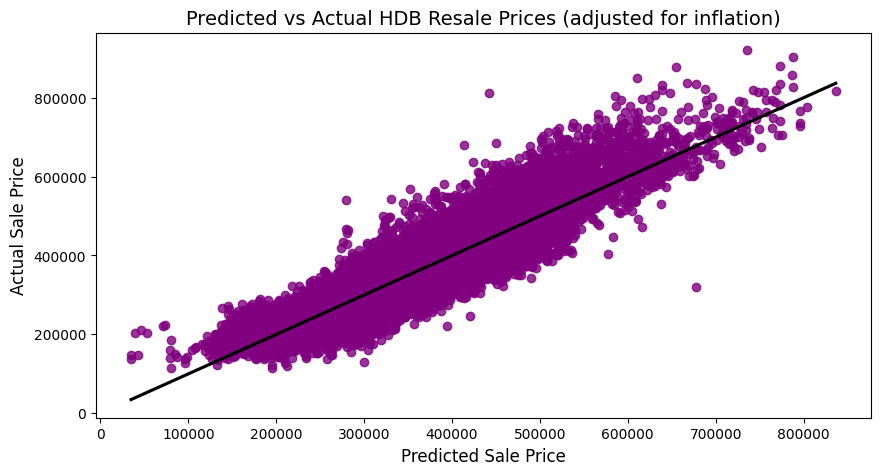

In [53]:
# Create scatterplot to show predicted values versus actual values
lr.fit(X_train_sc, y_train)
y_preds_lr = lr.predict(X_test_sc)

plt.figure(figsize=(10,5))
sns.regplot(data=X_train_sc, x=y_preds_lr, y=y_test, color='purple', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=12)
plt.ylabel('Actual Sale Price', fontsize=12)
plt.title('Predicted vs Actual HDB Resale Prices (adjusted for inflation)', fontsize=14)

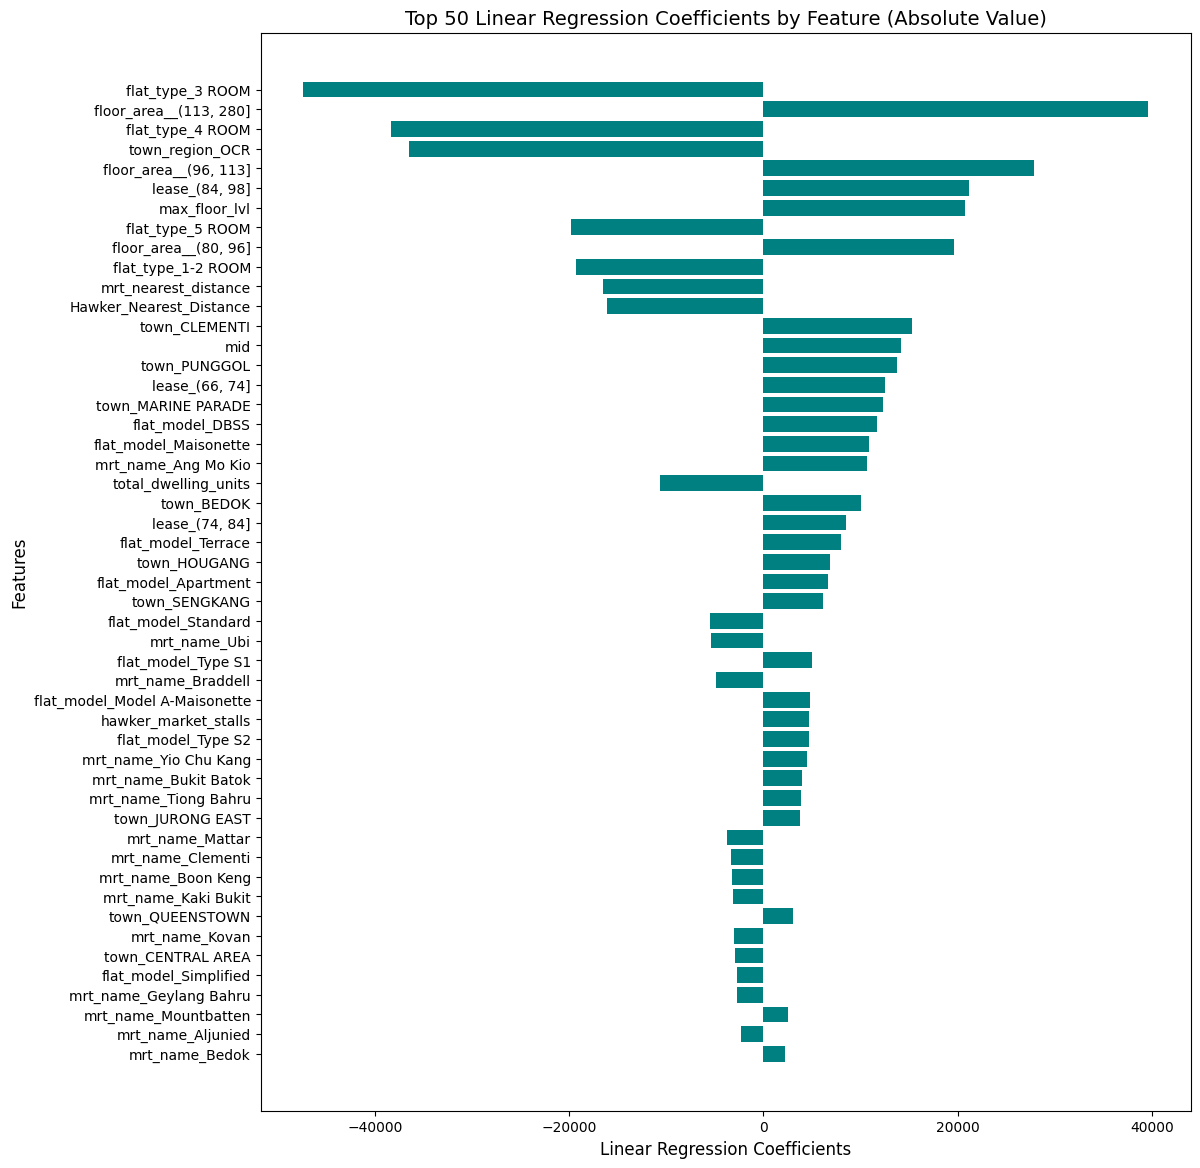

In [54]:
# Create a DataFrame for linear regression coefficients
coeffs = lr.coef_
df_coeffs = pd.DataFrame({'Feature': X.columns, 'coefficients': coeffs})
df_coeffs['abs_coeff'] = df_coeffs['coefficients'].abs()
df_coeffs.sort_values(by = 'abs_coeff', ascending=False).reset_index().drop(columns='index')

sorted_coeffs = df_coeffs.sort_values(by='abs_coeff', ascending=False)
# Select the top 50 features
top_50_coeffs = sorted_coeffs.head(50)
# Create a bar chart
plt.figure(figsize=(12, 14))
plt.barh(top_50_coeffs['Feature'], top_50_coeffs['coefficients'], color='teal')
plt.xlabel('Linear Regression Coefficients', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 50 Linear Regression Coefficients by Feature (Absolute Value)', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest coefficient at the top
plt.show()


Just to Recap the Multilinear Regression model:
$$ \text{Y} = \beta_0 + \beta_1 \text{X}_1 + \beta_2 \text{X}_2 + ... + \beta_p \text{X}_p + \epsilon $$

where
- $\text{Y}$ = Target Variable (HDB Resale Price)
- $\text{X}$ = Features
- $\beta$ = Weights / Coefficients
 

After generating the multilinear regression model and calculating the coefficients of each feature, we can see that the top features are:

- Negative Correlation
    1) Flat Type (3 or 4 Room)
    2) Town Region OCR
    3) MRT Nearest Distances
    4) Hawker Nearest Distances
    
- Positive Correlation 
    1) 113-280 sqm 
    2) Remaining Lease (84-98 years)
    3) Max Floor Level

Some interesting / unique features:
1) the **max floor level** of a HDB flat showed up as a more important predictor than the mid storey of the house - one would expect that the latter would be a more important indicator. Perhaps this can be explained by super high rise flats being in more expensive towns like Outram and Queenstown (for eg Pinnacle @ Duxton, Dawson @ Queenstown)
2) **MRT and Hawker Nearest Distance** had a negative correlation with HDB resale prices. The lower the distance between these amenities, the higher the resale prices. This means that people are willing to pay higher prices for convenience.

### 9. Recommendations

From the perspective of an individual looking to sell his/her HDB flat:

**1. Flat Size**: In general, the higher the floor area, the higher the resale value. However, HDB Flats with floor areas above the median (113-280 square metres) have an even higher resale value <br>
**2. Location Matters:** HDB flats located in CCR or RCR regions should have a potentially better resale value. This is because flats in these locations are closer to town and Central Business District (CBD), hence should fetch a higher price. <br>
**3. Remaining Lease:** HDB flats have an “expiry date”, given its 99-year lease period. Therefore, there is more premium placed on HDB flats with a higher remaining lease as there is a longer timeline that the flat can be lived in. <br>
**4. Floor Level:** Higher floor levels are associated with better resale prices, possibly due to better views and desirable locations. HDB flats with 1) an overall high maximum floor level of the block and 2) high floor level, have a higher resale price.<br>

In summary, HDB resale prices are largely affected by factors like flat size, location, remaining lease period and floor level. It is important to prioritise these factors when considering HDB flats for purchase or investment. 



### 10. Model Limitations

1. **Model Selection**: This project only used Linear Regression and Regularization techniques. Can explore other models like Xgbooset, Gradient boosting, or even neural networks that might be better at predicting HDB resale prices.
2. **Trade off between No. of Features and Accuracy**: Initially, I wanted to narrow down the features to less than 40. However, from the summary table in Item 7: Evaluating of Models, we can see that the model's RMSE score increases by about 4000 when there is a decrease in features. Hence, I stuck with the model with 104 features. While there will be more computing power and processing steps involved, it helps to improve the model accuracy to predict HDB resale prices.
2. **Data Currency**: The dataset used for model training is based on historical data up to 2021. This limitation means that the model may not reflect recent market changes. To address this, it would be beneficial to explore the possibility of linking the model directly to a live data source like the SingStat website via an API to access the most up-to-date information.
3. **External Factors**: The model does not account for recent or future public transport developments, new MRT lines, shopping malls, schools, or other infrastructure changes. These developments can significantly influence people's preferences for different areas and housing, thereby affecting HDB resale prices. The model's predictions may not fully capture the impact of these external factors.
4. **Changing Work Dynamics**: The COVID-19 pandemic has accelerated the adoption of flexible work arrangements and increased remote work. This shift in work dynamics can alter the importance of location as a factor affecting HDB resale prices. The model may not fully account for these changing trends, potentially leading to inaccuracies in predictions.


### 11. Final Predictions and Submission
#### Adjusting predicted house prices back to nominal form

We must remember that the prices were adjusted for inflation at the start of the project. This was done using the House Resale Price Index from the Singapore Statistics website. Hence, we must convert the predicted house prices back to their nominal (non-inflation-adjusted) form when generating results. 

This must also be done when submitting answers to Kaggle.

In [55]:
X_test['y_preds_adjusted'] = y_preds_lr

In [56]:
# read test data that was cleaned in notebook 3
test_cleaned = pd.read_csv("./datasets/test_cleaned.csv")
test_cleaned = test_cleaned.drop(columns='Unnamed: 0')

In [57]:
test_cleaned.head()

mid  max_floor_lvl  commercial  market_hawker  precinct_pavilion  \
0    8             12           1              0                  0   
1    5             14           0              0                  0   
2    8             12           0              0                  0   
3    2             14           0              0                  0   
4   17             25           0              0                  0   

   total_dwelling_units  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0                   132             877.431572               687.576779   
1                    53             534.037705              2122.346226   
2                   218             817.050453               152.287621   
3                   104            1272.737194               501.892158   
4                   144            1070.963675               437.593564   

   hawker_food_stalls  hawker_market_stalls  ...  mrt_name_Toa Payoh  \
0                  56                   123  ...                   0   
1                  72                    94  ...                   0   
2                  50                   100  ...                   0   
3                  52                   112  ...                   0   
4                  60                    87  ...                   0   

   mrt_name_Ubi  mrt_name_Woodleigh  mrt_name_Yio Chu Kang  lease_(66, 74]  \
0             0                   0                      0               1   
1             0                   0                      0               0   
2             0                   0                      0               0   
3             0                   0                      0               0   
4             0                   0                      0               1   

   lease_(74, 84]  lease_(84, 98]  floor_area__(80, 96]  \
0               0               0                     1   
1               0               1                     0   
2               0               0                     0   
3               0               0                     0   
4               0               0                     0   

   floor_area__(96, 113]  floor_area__(113, 280]  
0                      0                       0  
1                      1                       0  
2                      0                       0  
3                      1                       0  
4                      1                       0  

[5 rows x 104 columns]

In [58]:
# Refit model on entire training dataset
X_scaled = ss.fit_transform(X)
lr.fit(X_scaled,y)

LinearRegression()

In [59]:
X.shape

(150634, 104)

In [60]:
test_cleaned_sc = ss.transform(test_cleaned)

In [61]:
final_preds = lr.predict(test_cleaned_sc)

In [62]:
pd.DataFrame(final_preds)
final_preds = pd.DataFrame({'final_y_preds': final_preds})

In [63]:
test = pd.read_csv("./datasets/test.csv", low_memory = False)

In [64]:
# merge y preds to original dataset

merged_preds = test.merge(final_preds, left_index=True, right_index=True)

In [65]:
merged_preds.columns

Index(['id', 'Tranc_YearMonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'Tranc_Year', 'Tranc_Month', 'mid_storey', 'lower', 'upper', 'mid',
       'full_flat_type', 'address', 'floor_area_sqft', 'hdb_age',
       'max_floor_lvl', 'year_completed', 'residential', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold',
       '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distan

In [66]:
# merge test data with hdb cpi to get price index
hdb_cpi = pd.read_csv("./datasets/hdb_cpi.csv", skiprows = 9)
hdb_cpi = hdb_cpi.head(130)
hdb_cpi[['year', 'quarter']] = hdb_cpi['Data Series'].str.split(expand=True)
hdb_cpi['year'] = pd.to_numeric(hdb_cpi['year'])
hdb_cpi['quarter'] = hdb_cpi['Data Series'].str.extract(r'(\d+)Q').astype(int)

merged_preds['date'] = pd.to_datetime(merged_preds['Tranc_YearMonth'])
merged_preds['quarter'] = merged_preds['date'].dt.quarter

final = merged_preds.merge(hdb_cpi, left_on=['Tranc_Year', 'quarter'],
                      right_on=['year', 'quarter'], how='left')



In [67]:
# calculate final prediction scores
final['Predicted'] = (final['final_y_preds'] * (final['Total (Index)']/100))

In [68]:
submission = final[['id','Predicted']]

In [69]:
submission.shape

(16737, 2)

In [70]:
submission.to_csv('./datasets/kaggle-submission.csv', index = False)

Kaggle
RMSE score: 43,217